In [1]:
import pandas as pd
titanic=pd.read_csv('titanic_train.csv')
print('連結完成')
print(titanic.head(10))
print('改為網頁輸出，較方便查看內容')
titanic.to_html('titanic1.html')
print('了解欄位名稱，-容易有誤判風險')
print(titanic.columns)
print('儲存欄位名稱')
cols=titanic.columns
titanic.columns=[str.replace('-','_') for str in cols]
print('修改完成')
print(titanic.columns)
print('改為網頁輸出，較方便查看內容')
titanic.to_html('titanic2.html')

連結完成
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    mal

In [2]:
print('查找遺失值1')
print(titanic.isnull().sum())#計算遺失值數量
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(titanic.dtypes) #全部欄位的資料型態

查找遺失值1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
查看每個欄位的資料型態
主要目的查看那些欄位是object，object代表文字型態
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Age 177、Cabin 687、Embarked 2有遺失值，需要處理，總共資料為890
之前的自駕車資料，money欄位是y是訓練的目標有遺失值，用取代的方式會有不公平情況，所以選擇刪除遺失值
Cabin欄位遺失值過高，沒有參考價值，所以整個欄位將要刪除
港口Embarked有兩個遺失值，我們先了解資料分布情況
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
C+Q的總和與S港的數量差異很大，所以2個遺失值不影響港口的選擇
所以我們選擇加入最多資料的港口
Embarked最多資料： 0    S
Name: Embarked, dtype: object
年齡Age有177個遺失值，這是數值欄位
Age的最小值： 0.42
Age的最大值： 80.0
Age的平均值： 29.69911764705882
Age的中位數： 28.0


/tmp/ipython-input-152746526.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)


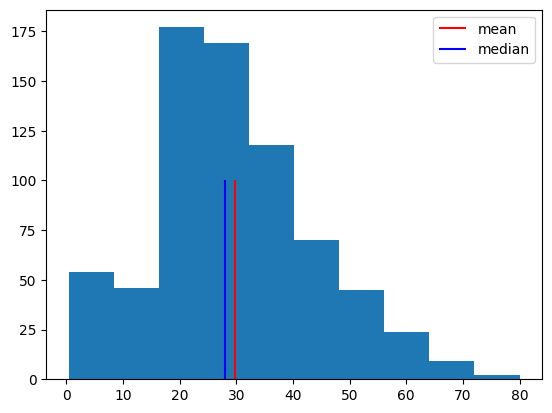

Age欄位若填充0不合適，沒有人0歲
Age欄位的平均值有被拉高，也就是有比較大的數值存在
Age欄位適合填充中位數
Age的最小值： 0.42
Age的最大值： 80.0
Age的平均值： 29.36158249158249
Age的中位數： 28.0


/tmp/ipython-input-152746526.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)


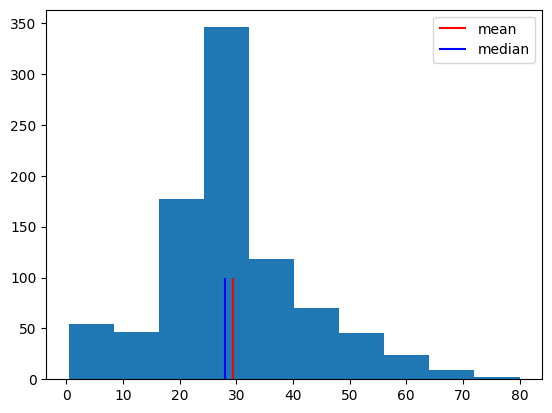

查找遺失值2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
查看每個欄位的資料型態
主要目的查看那些欄位是object，object代表文字型態
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [3]:
print('Age 177、Cabin 687、Embarked 2有遺失值，需要處理，總共資料為890')
print('之前的自駕車資料，money欄位是y是訓練的目標有遺失值，用取代的方式會有不公平情況，所以選擇刪除遺失值')
print('Cabin欄位遺失值過高，沒有參考價值，所以整個欄位將要刪除')
try:
  titanic.drop(columns=['Cabin'],inplace=True)
except:
  pass
print('港口Embarked有兩個遺失值，我們先了解資料分布情況')
print(titanic['Embarked'].value_counts())
print('C+Q的總和與S港的數量差異很大，所以2個遺失值不影響港口的選擇')
print('所以我們選擇加入最多資料的港口')
print('Embarked最多資料：',titanic['Embarked'].mode())
try:
  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)
except:
  pass
print('年齡Age有177個遺失值，這是數值欄位')
print('Age的最小值：',titanic['Age'].min())
print('Age的最大值：',titanic['Age'].max())
print('Age的平均值：',titanic['Age'].mean())
print('Age的中位數：',titanic['Age'].median())
import matplotlib.pyplot as plt
plt.hist(titanic['Age'])
plt.vlines(titanic['Age'].mean(),0,100,color='red',label='mean')
plt.vlines(titanic['Age'].median(),0,100,color='blue',label='median')
plt.legend()
plt.show()
print('Age欄位若填充0不合適，沒有人0歲')
print('Age欄位的平均值有被拉高，也就是有比較大的數值存在')
print('Age欄位適合填充中位數')
try:
  titanic['Age'].fillna(titanic['Age'].median(),inplace=True)
except:
  pass
print('Age的最小值：',titanic['Age'].min())
print('Age的最大值：',titanic['Age'].max())
print('Age的平均值：',titanic['Age'].mean())
print('Age的中位數：',titanic['Age'].median())
import matplotlib.pyplot as plt
plt.hist(titanic['Age'])
plt.vlines(titanic['Age'].mean(),0,100,color='red',label='mean')
plt.vlines(titanic['Age'].median(),0,100,color='blue',label='median')
plt.legend()
plt.show()
print('查找遺失值2')
print(titanic.isnull().sum())#計算遺失值數量
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(titanic.dtypes) #全部欄位的資料型態


In [4]:
print('遺失值乍看之下沒有，我們再來做一個動作確認')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in titanic.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',titanic[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在')
  if titanic[i].dtype==object:
    try:
      titanic[i]=titanic[i].astype('float') #轉換
      list3.append(i) #轉換成功
      print('轉換成功')
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)

遺失值乍看之下沒有，我們再來做一個動作確認
分成數值與字串兩種欄位資料紀錄
欄位名稱: PassengerId
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Survived
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Pclass
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Name
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Sex
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Age
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: SibSp
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Parch
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Ticket
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
欄位名稱: Fare
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
欄位名稱: Embarked
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，可以轉換就代表有問題，有遺失值存在
不能轉換
數值欄位: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
文字欄位: ['Name', 'Sex', 'Ticket', 'Embarked']


In [8]:
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.linear_model import LogisticRegression #羅吉斯
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB #貝氏
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
from sklearn.metrics import accuracy_score #準確率
from sklearn.metrics import classification_report #分類報告
from sklearn.metrics import confusion_matrix #混淆矩陣

需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同


In [6]:
#1、X與y資料準備，羅吉斯
print('9.發現家庭成員也可以整併，5人以上就當作5人')
print('為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Ticket'],inplace=True) #修改這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('建立票價區間')
titanic2['FareBin']=pd.qcut(titanic2['Fare'],4,labels=['Q1','Q2','Q3','Q4']) #category
print(titanic2['FareBin'].dtype)
titanic2['FareBin']=titanic2['FareBin'].astype('object')
titanic2.drop(columns=['Fare'],inplace=True)
print('建立年齡區間')
titanic2['AgeBin']=pd.cut(titanic2['Age'],5,labels=['A1','A2','A3','A4','A5'])
titanic2['AgeBin']=titanic2['AgeBin'].astype('object')

print('第七個練習於此加入')
print('從名字中提取頭銜')
titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)
print(titanic2['title'].value_counts())
print('性別欄位轉換為老人、小孩、男性、女性')
titanic2['person']=titanic2['Sex']
titanic2.loc[titanic2['Age']<14,'person']='young'
titanic2.loc[titanic2['Age']>50,'person']='elder'
print('刪除若干欄位')
titanic2.drop(columns=['Age'],inplace=True)
titanic2.drop(columns=['Name'],inplace=True)
titanic2.drop(columns=['Sex'],inplace=True)

print('第8個練習於此加入')
keep_titles=['Mr','Miss','Mrs']
titanic2['title']=titanic2['title'].apply(lambda x:x if x in keep_titles else 'Other')
print(titanic2['title'].value_counts())

print('第9個練習於此加入')
titanic2['family_group']=titanic2['family'].astype('object')
titanic2['family_group']=titanic2['family'].apply(lambda x:x if x<5 else '5')
print(titanic2['family_group'].value_counts())
titanic2.drop(columns=['family'],inplace=True)
titanic2['Pclass']=titanic2['Pclass'].astype('object')

print('處理titanic2內的文字欄位')
print(titanic2.dtypes)
print(titanic2.head)
titanic2.to_html('part7.html')

print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
#titanic3=titanic2[['person','Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
titanic3=titanic2[['person','Embarked','FareBin','title','family_group','Pclass']]#修改這一行
#titanic3=titanic2[['Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
#titanic4['Pclass']=titanic2['Pclass']
#titanic4['family']=titanic2['family']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=LogisticRegression(solver='liblinear',max_iter=1000)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))


<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-862867960.py:20: SyntaxWarning: invalid escape sequence '\.'
  titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)


9.發現家庭成員也可以整併，5人以上就當作5人
為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串
建立票價區間
category
建立年齡區間
第七個練習於此加入
從名字中提取頭銜
title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64
性別欄位轉換為老人、小孩、男性、女性
刪除若干欄位
第8個練習於此加入
title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64
第9個練習於此加入
family_group
1    537
2    161
3    102
5     62
4     29
Name: count, dtype: int64
處理titanic2內的文字欄位
Survived         int64
Pclass          object
Embarked        object
FareBin         object
AgeBin          object
title           object
person          object
family_group    object
dtype: object
<bound method NDFrame.head of      Survived Pclass Embarked FareBin AgeBin  title  person family_group
0           0      3        S      Q1     A2     Mr    male   

In [9]:
#1、X與y資料準備,高斯貝氏
print('9.發現家庭成員也可以整併，5人以上就當作5人')
print('為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Ticket'],inplace=True) #修改這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('建立票價區間')
titanic2['FareBin']=pd.qcut(titanic2['Fare'],4,labels=['Q1','Q2','Q3','Q4']) #category
print(titanic2['FareBin'].dtype)
titanic2['FareBin']=titanic2['FareBin'].astype('object')
titanic2.drop(columns=['Fare'],inplace=True)
print('建立年齡區間')
titanic2['AgeBin']=pd.cut(titanic2['Age'],5,labels=['A1','A2','A3','A4','A5'])
titanic2['AgeBin']=titanic2['AgeBin'].astype('object')

print('第七個練習於此加入')
print('從名字中提取頭銜')
titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)
print(titanic2['title'].value_counts())
print('性別欄位轉換為老人、小孩、男性、女性')
titanic2['person']=titanic2['Sex']
titanic2.loc[titanic2['Age']<14,'person']='young'
titanic2.loc[titanic2['Age']>50,'person']='elder'
print('刪除若干欄位')
titanic2.drop(columns=['Age'],inplace=True)
titanic2.drop(columns=['Name'],inplace=True)
titanic2.drop(columns=['Sex'],inplace=True)

print('第8個練習於此加入')
keep_titles=['Mr','Miss','Mrs']
titanic2['title']=titanic2['title'].apply(lambda x:x if x in keep_titles else 'Other')
print(titanic2['title'].value_counts())

print('第9個練習於此加入')
titanic2['family_group']=titanic2['family'].astype('object')
titanic2['family_group']=titanic2['family'].apply(lambda x:x if x<5 else '5')
print(titanic2['family_group'].value_counts())
titanic2.drop(columns=['family'],inplace=True)
titanic2['Pclass']=titanic2['Pclass'].astype('object')

print('處理titanic2內的文字欄位')
print(titanic2.dtypes)
print(titanic2.head)
titanic2.to_html('part7.html')

print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
#titanic3=titanic2[['person','Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
titanic3=titanic2[['person','Embarked','FareBin','title','family_group','Pclass']]#修改這一行
#titanic3=titanic2[['Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
#titanic4['Pclass']=titanic2['Pclass']
#titanic4['family']=titanic2['family']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=GaussianNB()
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))


<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-236812760.py:20: SyntaxWarning: invalid escape sequence '\.'
  titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)


9.發現家庭成員也可以整併，5人以上就當作5人
為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串
建立票價區間
category
建立年齡區間
第七個練習於此加入
從名字中提取頭銜
title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64
性別欄位轉換為老人、小孩、男性、女性
刪除若干欄位
第8個練習於此加入
title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64
第9個練習於此加入
family_group
1    537
2    161
3    102
5     62
4     29
Name: count, dtype: int64
處理titanic2內的文字欄位
Survived         int64
Pclass          object
Embarked        object
FareBin         object
AgeBin          object
title           object
person          object
family_group    object
dtype: object
<bound method NDFrame.head of      Survived Pclass Embarked FareBin AgeBin  title  person family_group
0           0      3        S      Q1     A2     Mr    male   

In [10]:
#1、X與y資料準備,多項式貝氏
print('9.發現家庭成員也可以整併，5人以上就當作5人')
print('為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Ticket'],inplace=True) #修改這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('建立票價區間')
titanic2['FareBin']=pd.qcut(titanic2['Fare'],4,labels=['Q1','Q2','Q3','Q4']) #category
print(titanic2['FareBin'].dtype)
titanic2['FareBin']=titanic2['FareBin'].astype('object')
titanic2.drop(columns=['Fare'],inplace=True)
print('建立年齡區間')
titanic2['AgeBin']=pd.cut(titanic2['Age'],5,labels=['A1','A2','A3','A4','A5'])
titanic2['AgeBin']=titanic2['AgeBin'].astype('object')

print('第七個練習於此加入')
print('從名字中提取頭銜')
titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)
print(titanic2['title'].value_counts())
print('性別欄位轉換為老人、小孩、男性、女性')
titanic2['person']=titanic2['Sex']
titanic2.loc[titanic2['Age']<14,'person']='young'
titanic2.loc[titanic2['Age']>50,'person']='elder'
print('刪除若干欄位')
titanic2.drop(columns=['Age'],inplace=True)
titanic2.drop(columns=['Name'],inplace=True)
titanic2.drop(columns=['Sex'],inplace=True)

print('第8個練習於此加入')
keep_titles=['Mr','Miss','Mrs']
titanic2['title']=titanic2['title'].apply(lambda x:x if x in keep_titles else 'Other')
print(titanic2['title'].value_counts())

print('第9個練習於此加入')
titanic2['family_group']=titanic2['family'].astype('object')
titanic2['family_group']=titanic2['family'].apply(lambda x:x if x<5 else '5')
print(titanic2['family_group'].value_counts())
titanic2.drop(columns=['family'],inplace=True)
titanic2['Pclass']=titanic2['Pclass'].astype('object')

print('處理titanic2內的文字欄位')
print(titanic2.dtypes)
print(titanic2.head)
titanic2.to_html('part7.html')

print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
#titanic3=titanic2[['person','Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
titanic3=titanic2[['person','Embarked','FareBin','title','family_group','Pclass']]#修改這一行
#titanic3=titanic2[['Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
#titanic4['Pclass']=titanic2['Pclass']
#titanic4['family']=titanic2['family']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=MultinomialNB()
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))


<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3829940938.py:20: SyntaxWarning: invalid escape sequence '\.'
  titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)


9.發現家庭成員也可以整併，5人以上就當作5人
為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串
建立票價區間
category
建立年齡區間
第七個練習於此加入
從名字中提取頭銜
title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64
性別欄位轉換為老人、小孩、男性、女性
刪除若干欄位
第8個練習於此加入
title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64
第9個練習於此加入
family_group
1    537
2    161
3    102
5     62
4     29
Name: count, dtype: int64
處理titanic2內的文字欄位
Survived         int64
Pclass          object
Embarked        object
FareBin         object
AgeBin          object
title           object
person          object
family_group    object
dtype: object
<bound method NDFrame.head of      Survived Pclass Embarked FareBin AgeBin  title  person family_group
0           0      3        S      Q1     A2     Mr    male   

In [11]:
#1、X與y資料準備,柏努力貝氏
print('9.發現家庭成員也可以整併，5人以上就當作5人')
print('為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串')
titanic2=titanic.copy()
titanic2.drop(columns=['PassengerId'],inplace=True)
titanic2.drop(columns=['Ticket'],inplace=True) #修改這一行
titanic2['family']=titanic2['SibSp']+titanic2['Parch']+1
titanic2.drop(columns=['SibSp','Parch'],inplace=True)
print('建立票價區間')
titanic2['FareBin']=pd.qcut(titanic2['Fare'],4,labels=['Q1','Q2','Q3','Q4']) #category
print(titanic2['FareBin'].dtype)
titanic2['FareBin']=titanic2['FareBin'].astype('object')
titanic2.drop(columns=['Fare'],inplace=True)
print('建立年齡區間')
titanic2['AgeBin']=pd.cut(titanic2['Age'],5,labels=['A1','A2','A3','A4','A5'])
titanic2['AgeBin']=titanic2['AgeBin'].astype('object')

print('第七個練習於此加入')
print('從名字中提取頭銜')
titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)
print(titanic2['title'].value_counts())
print('性別欄位轉換為老人、小孩、男性、女性')
titanic2['person']=titanic2['Sex']
titanic2.loc[titanic2['Age']<14,'person']='young'
titanic2.loc[titanic2['Age']>50,'person']='elder'
print('刪除若干欄位')
titanic2.drop(columns=['Age'],inplace=True)
titanic2.drop(columns=['Name'],inplace=True)
titanic2.drop(columns=['Sex'],inplace=True)

print('第8個練習於此加入')
keep_titles=['Mr','Miss','Mrs']
titanic2['title']=titanic2['title'].apply(lambda x:x if x in keep_titles else 'Other')
print(titanic2['title'].value_counts())

print('第9個練習於此加入')
titanic2['family_group']=titanic2['family'].astype('object')
titanic2['family_group']=titanic2['family'].apply(lambda x:x if x<5 else '5')
print(titanic2['family_group'].value_counts())
titanic2.drop(columns=['family'],inplace=True)
titanic2['Pclass']=titanic2['Pclass'].astype('object')

print('處理titanic2內的文字欄位')
print(titanic2.dtypes)
print(titanic2.head)
titanic2.to_html('part7.html')

print('3、X欄位都是文字型態，所以得做編碼處理')
print('3-1、產生一個DataFrame，放文字欄位')
titanic3=pd.DataFrame()
#titanic3=titanic2[['person','Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
titanic3=titanic2[['person','Embarked','FareBin','title','family_group','Pclass']]#修改這一行
#titanic3=titanic2[['Embarked','FareBin','AgeBin','title','family_group','Pclass']]#修改這一行
print(titanic3.head())
print('3-2、進行編碼處理')
titanic4=pd.get_dummies(titanic3)
print(titanic4.head())
print('3-3、加入數值欄位與y欄位')
#titanic4['Pclass']=titanic2['Pclass']
#titanic4['family']=titanic2['family']
titanic4['Survived']=titanic2['Survived']
print(titanic4.head())
print(titanic4.shape)
titanic4.to_html('titanic4.html')
x=titanic4.iloc[:,:-1]
y=titanic4.iloc[:,-1]
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=BernoulliNB(binarize=2)
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict1=model1.predict(x_test) #測試
y_predict2=model1.predict(x_train) #訓練
#8、模型進行評估
print('訓練的準確率:\n',accuracy_score(y_train,y_predict2))
print('測試的準確率:\n',accuracy_score(y_test,y_predict1))
print('測試的分類報告:\n',classification_report(y_test,y_predict1))
print('測試的混淆矩陣:\n',confusion_matrix(y_test,y_predict1))


<>:20: SyntaxWarning: invalid escape sequence '\.'
<>:20: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3316622468.py:20: SyntaxWarning: invalid escape sequence '\.'
  titanic2['title']=titanic2['Name'].str.extract('([A-Za-z]+)\.',expand=False)


9.發現家庭成員也可以整併，5人以上就當作5人
為了不讓數值差異太大，所以family才要做整理，使其分組化轉換為字串
建立票價區間
category
建立年齡區間
第七個練習於此加入
從名字中提取頭銜
title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64
性別欄位轉換為老人、小孩、男性、女性
刪除若干欄位
第8個練習於此加入
title
Mr       517
Miss     182
Mrs      125
Other     67
Name: count, dtype: int64
第9個練習於此加入
family_group
1    537
2    161
3    102
5     62
4     29
Name: count, dtype: int64
處理titanic2內的文字欄位
Survived         int64
Pclass          object
Embarked        object
FareBin         object
AgeBin          object
title           object
person          object
family_group    object
dtype: object
<bound method NDFrame.head of      Survived Pclass Embarked FareBin AgeBin  title  person family_group
0           0      3        S      Q1     A2     Mr    male   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


資料會呈現甚麼樣的圖表?
字串部分，以Bar顯示，分類方式操作


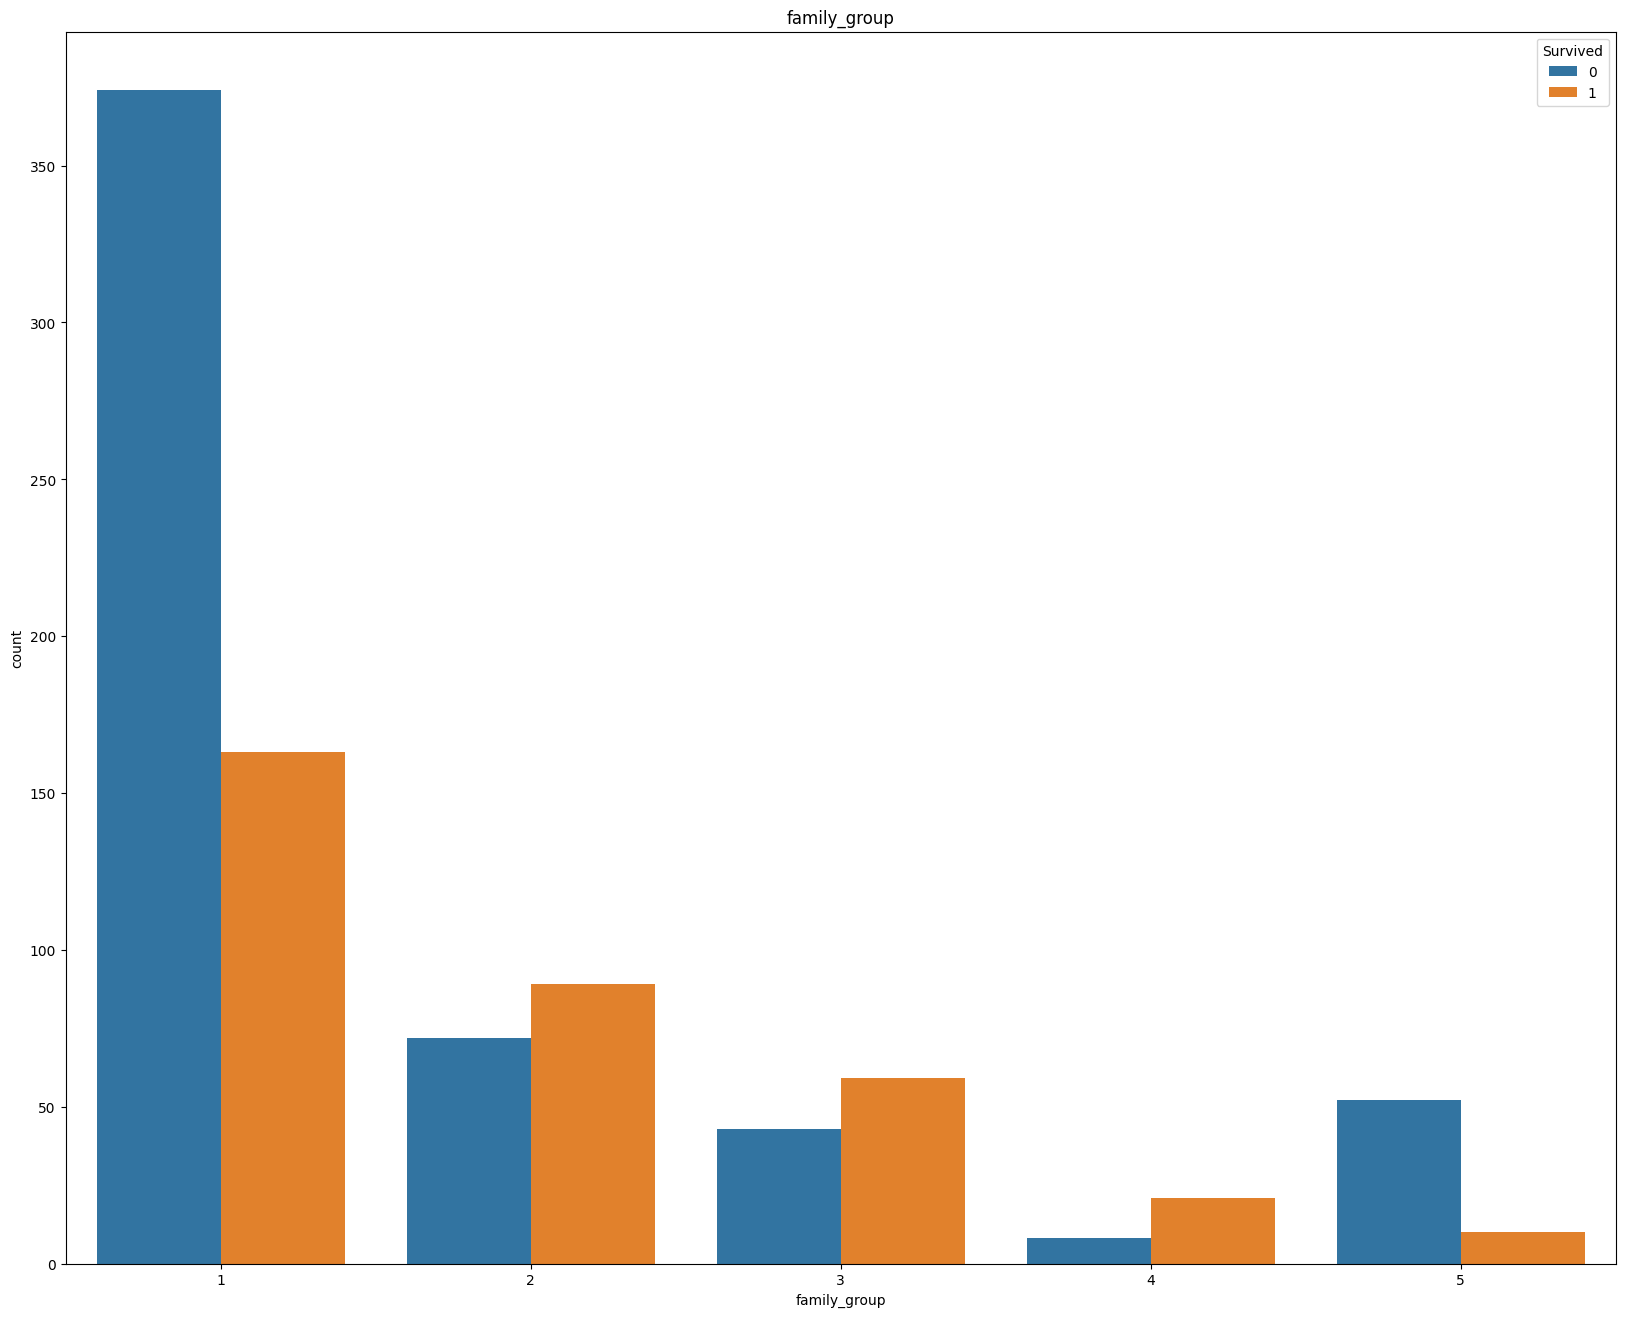

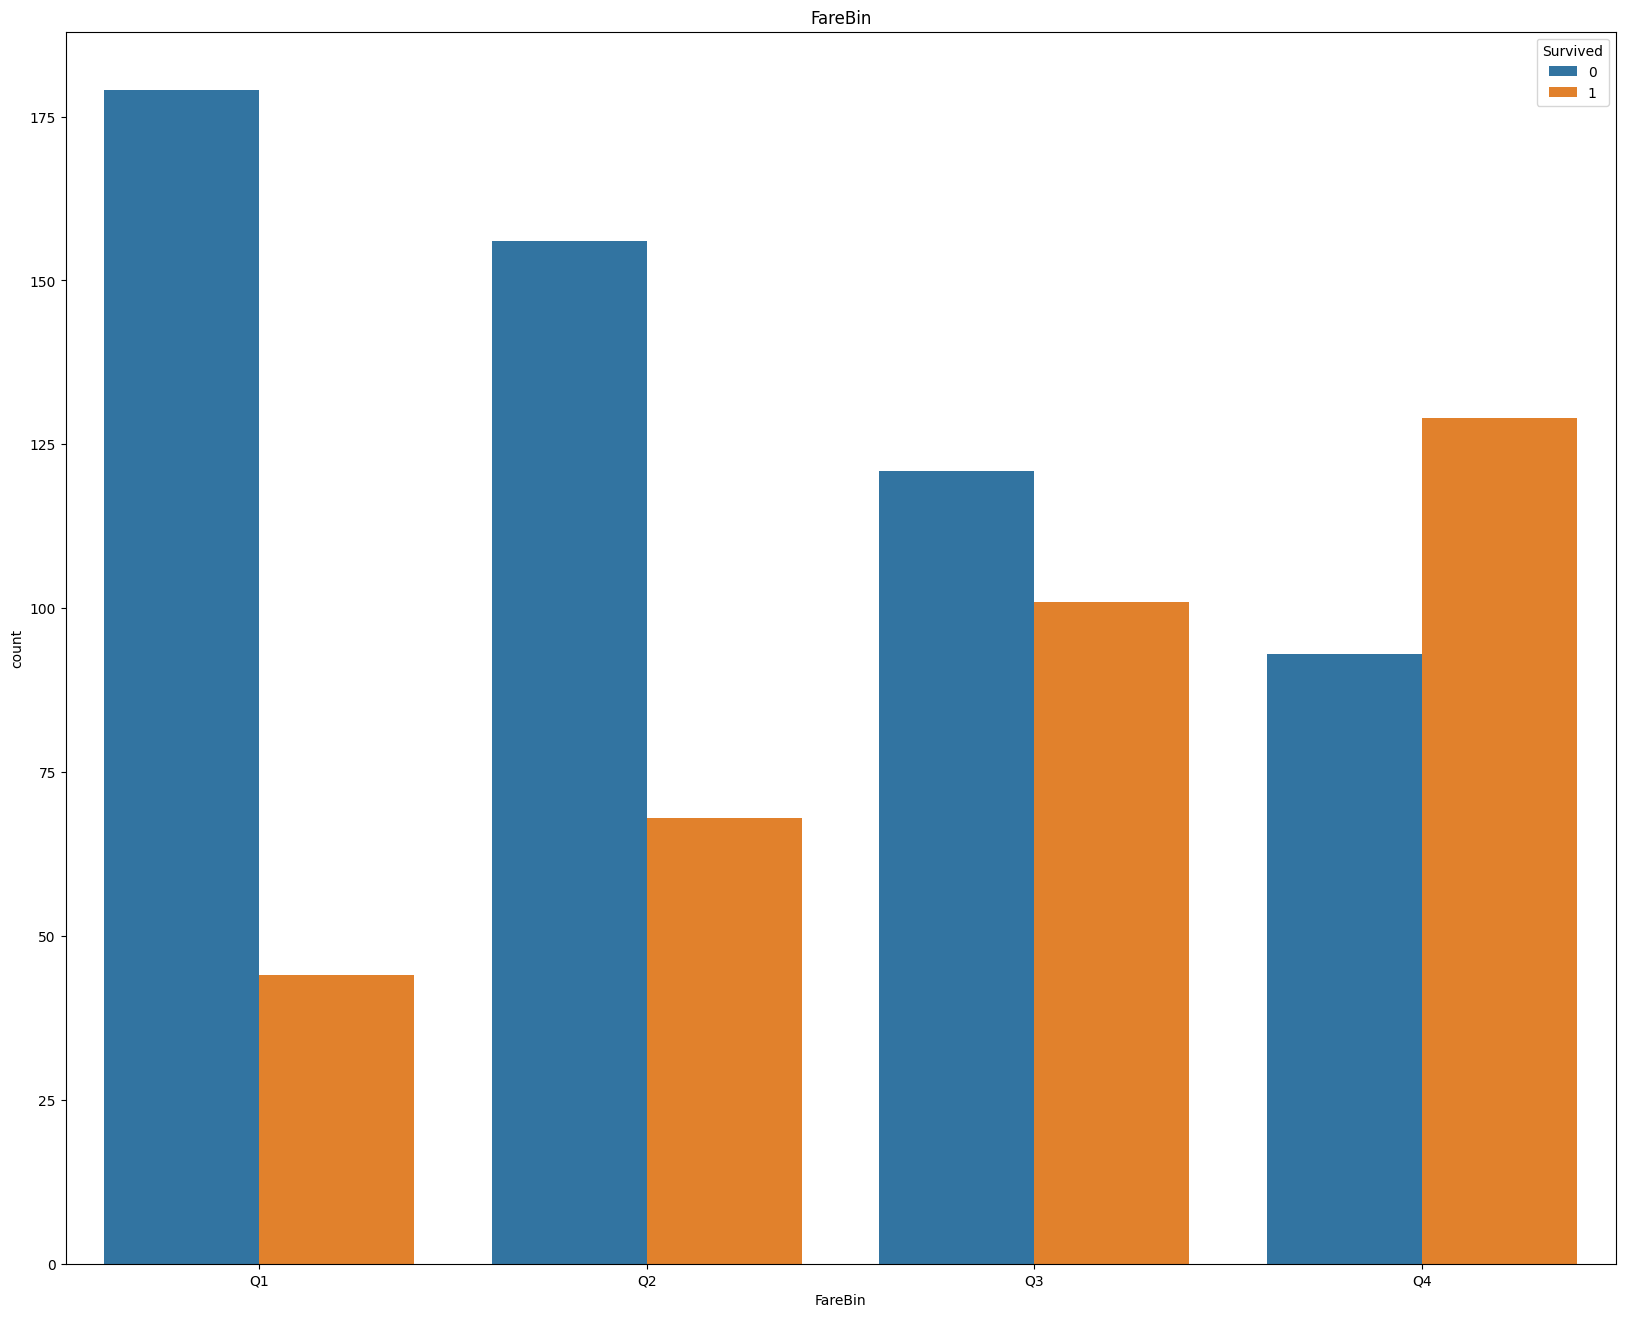

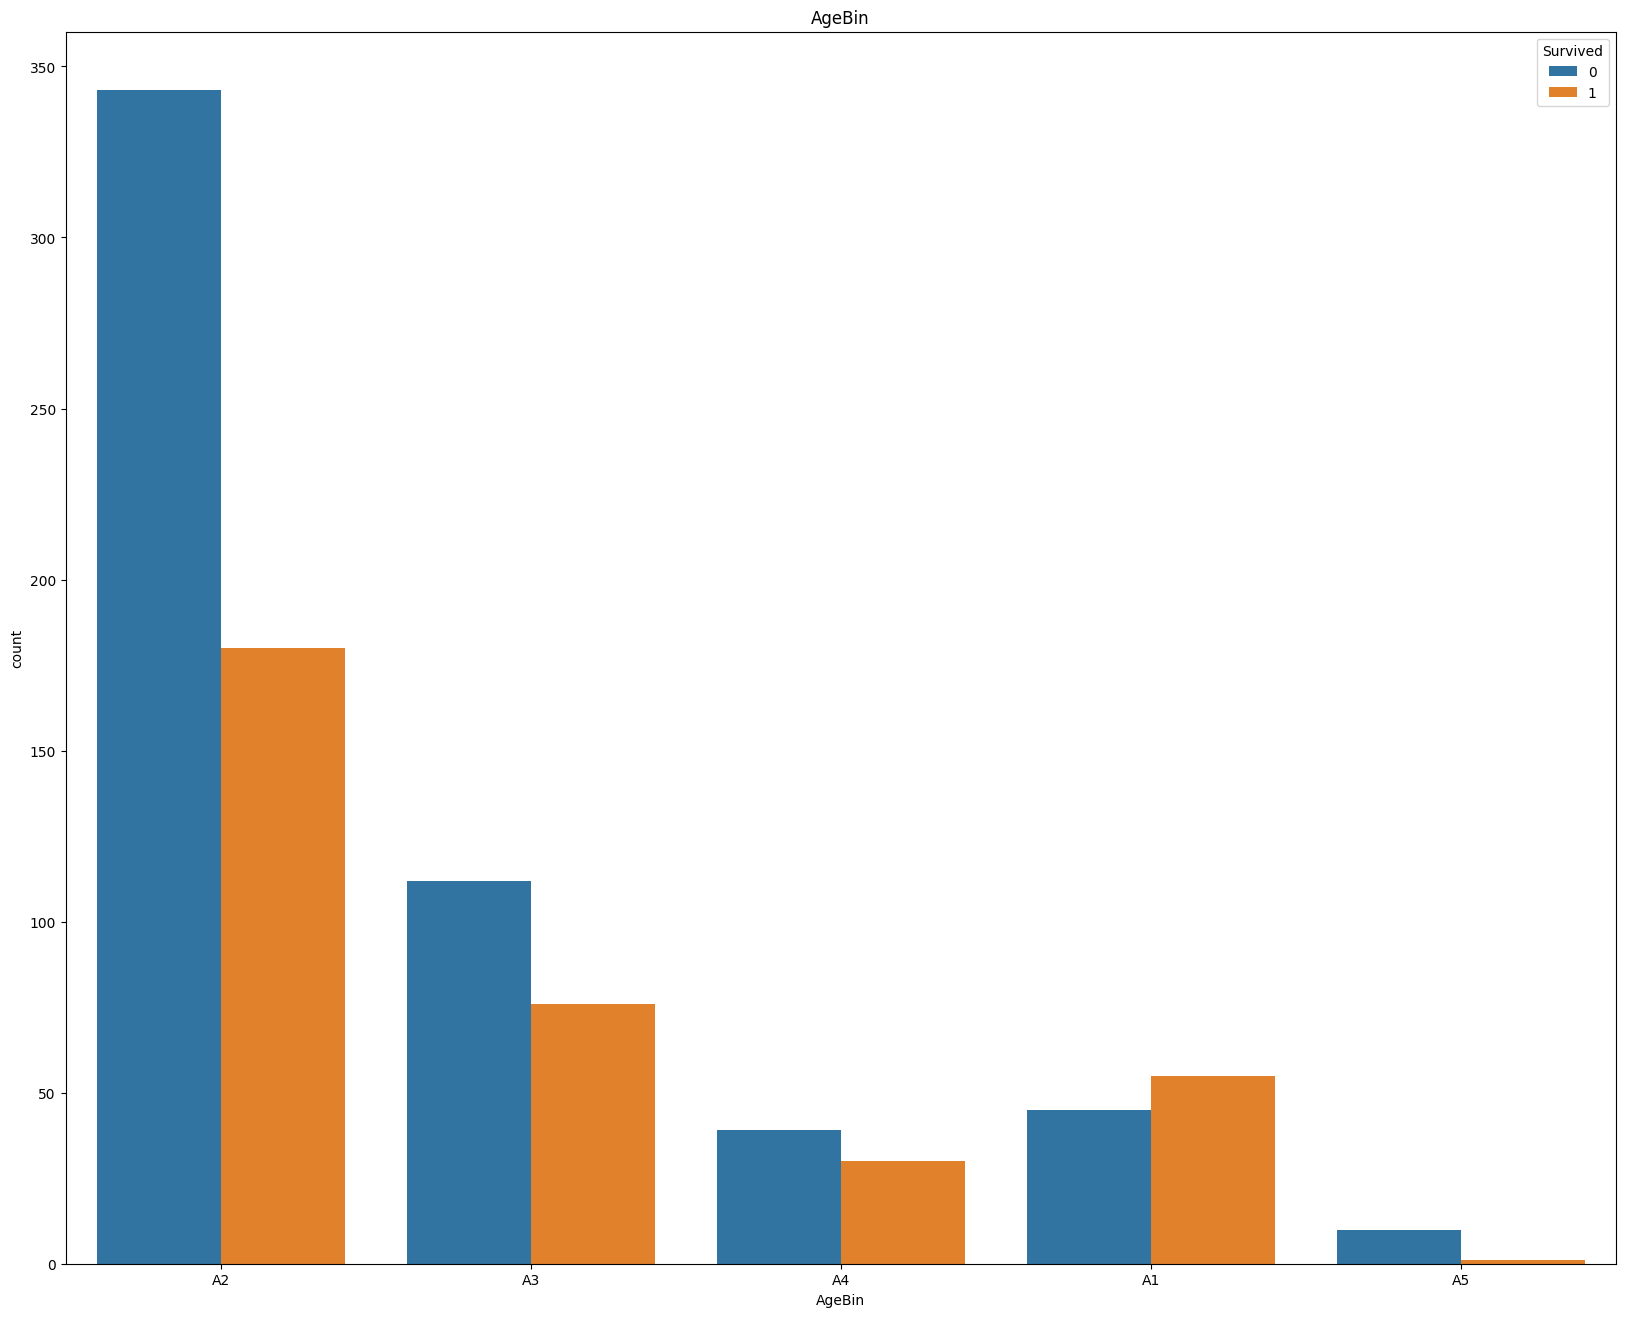

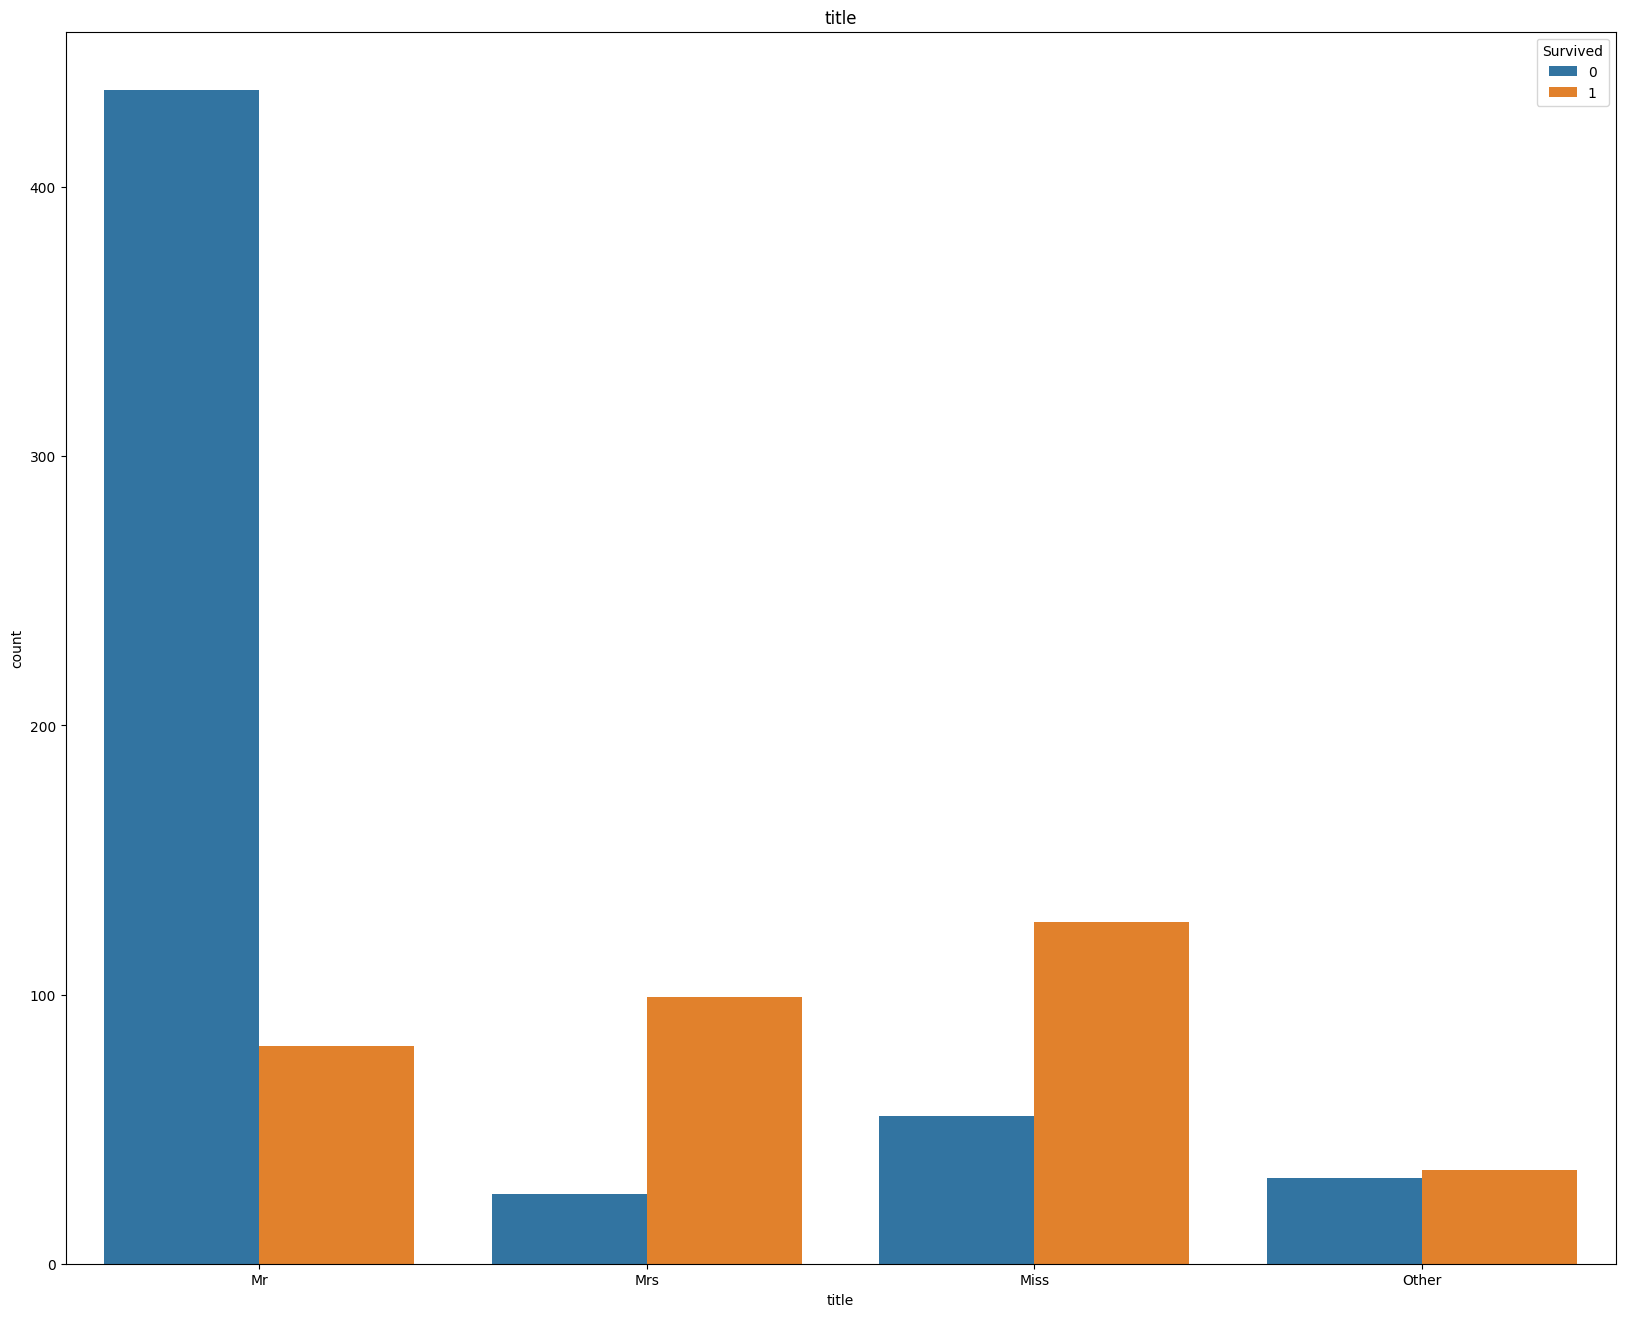

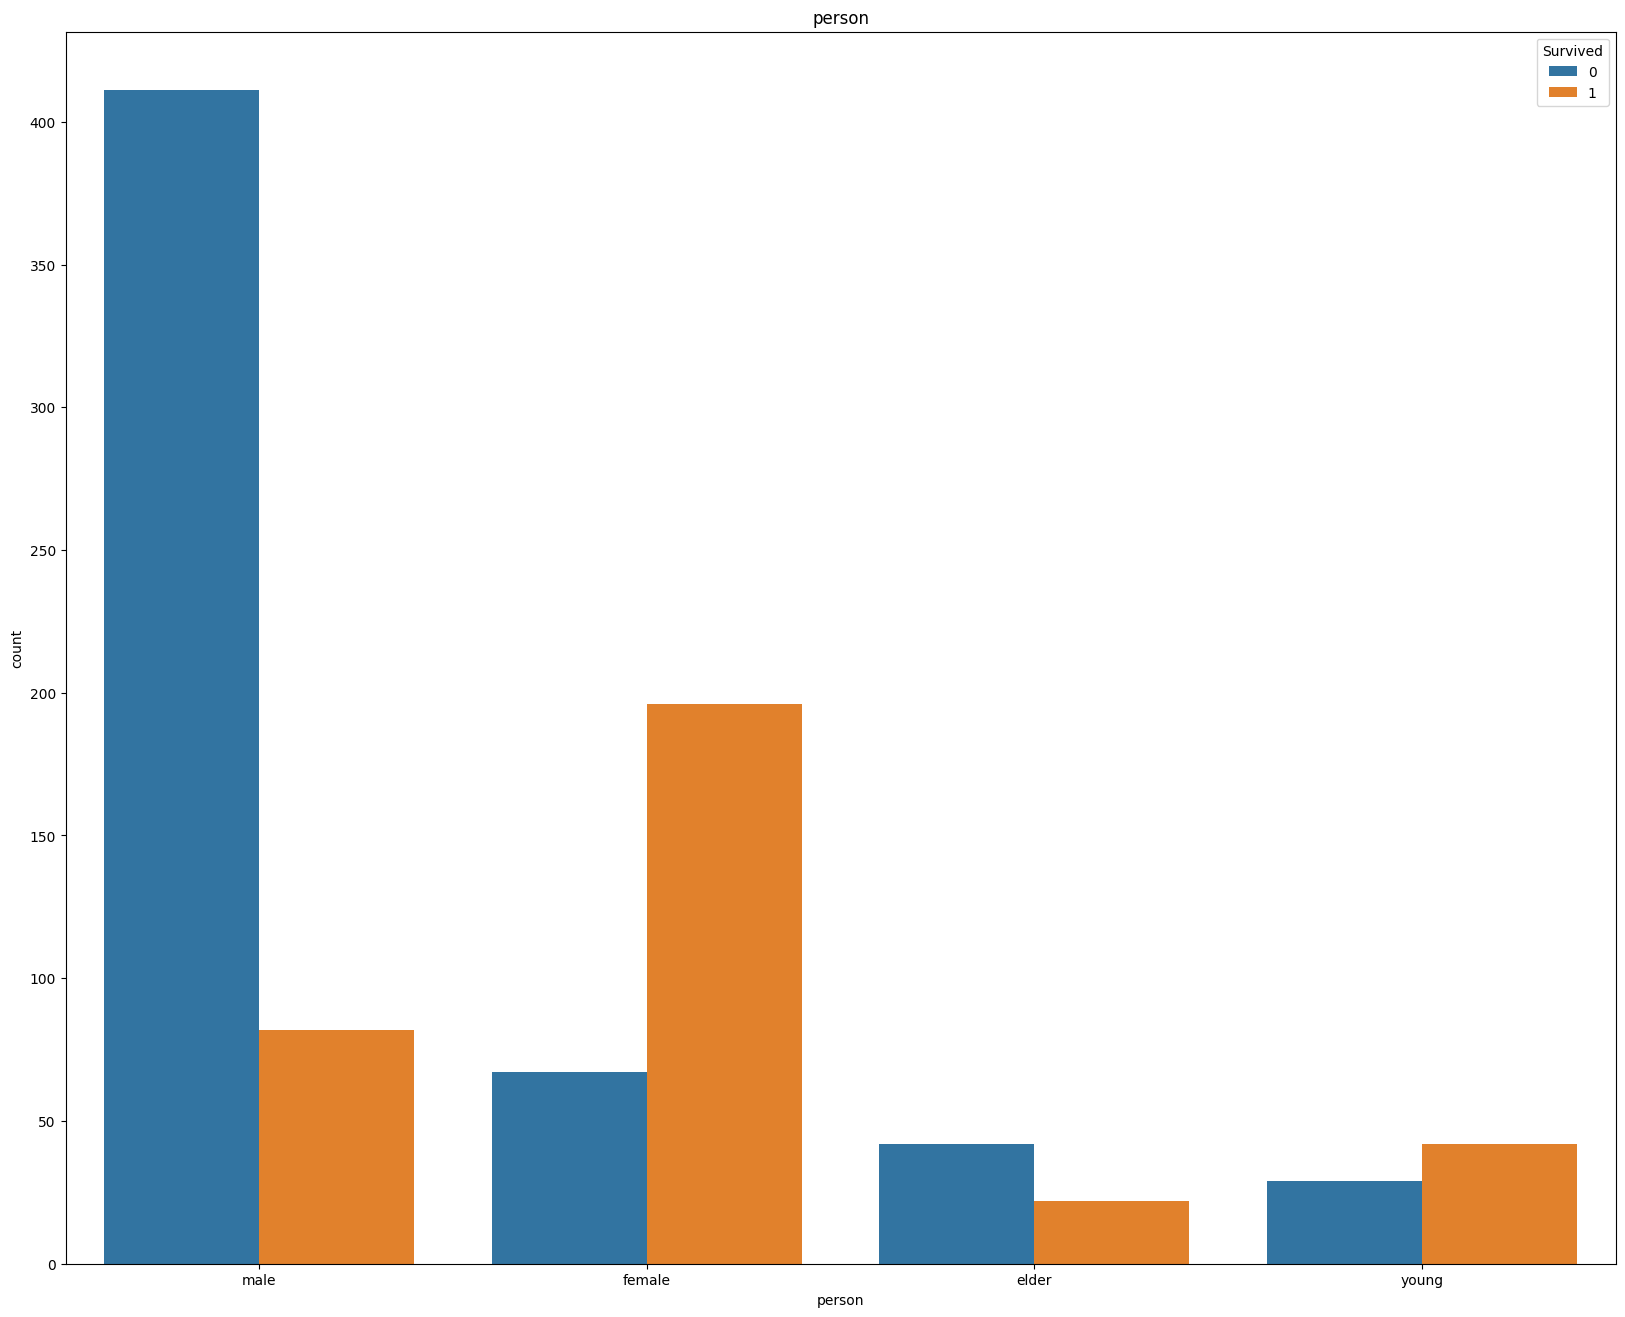

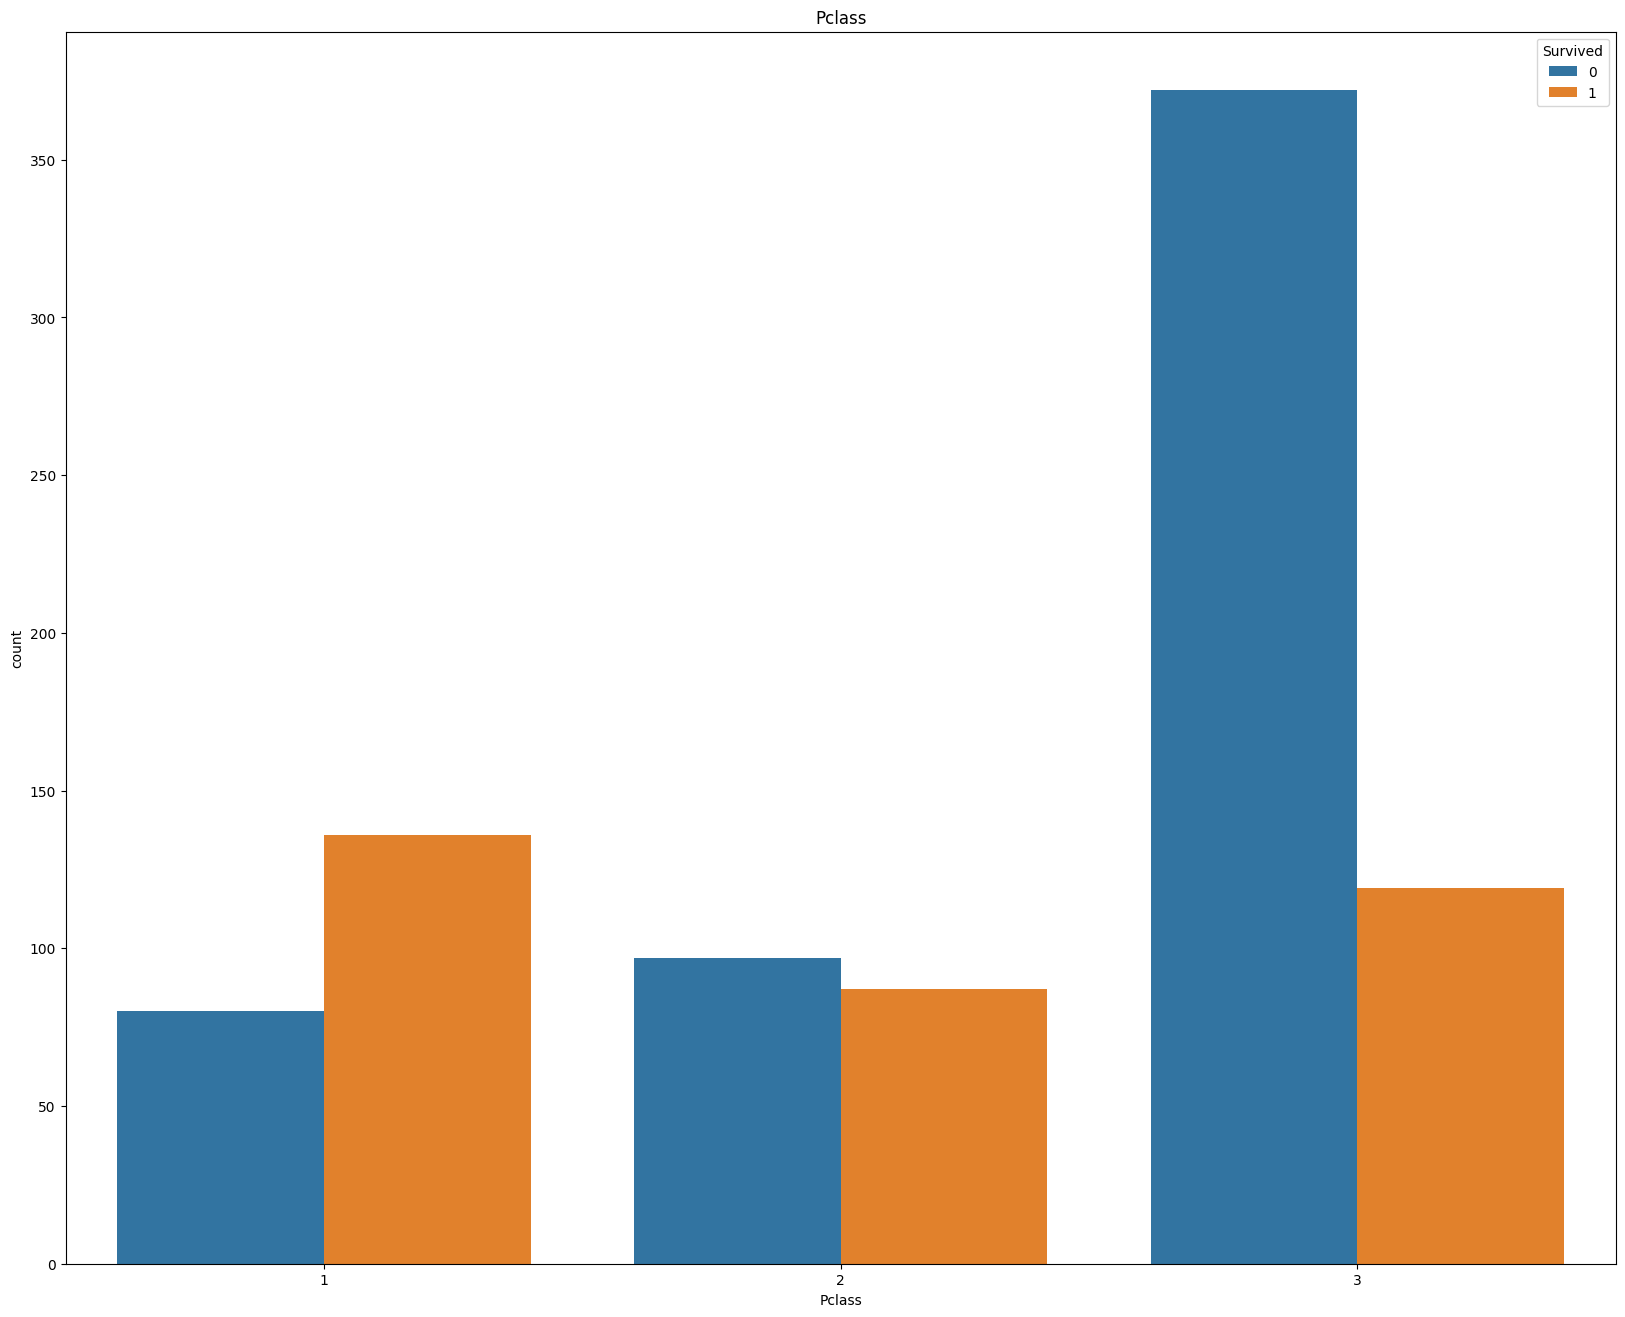

In [ ]:
print('資料會呈現甚麼樣的圖表?')
list5=['family_group','FareBin','AgeBin','title','person','Pclass']
print('字串部分，以Bar顯示，分類方式操作')
import matplotlib.pyplot as plt
import seaborn as sns
titanic2['family_group']=titanic2['family_group'].astype('int')#舉例
titanic2['FareBin']=titanic2['FareBin'].astype('category')#舉例
for cols in list5:
  plt.figure(figsize=(20,16))
  plt.title(cols)
  sns.countplot(x=cols,data=titanic2,hue='Survived')
  plt.savefig('bar5_'+cols+'.png')
  plt.show()

In [ ]:
import pandas as pd
import joblib
import re
model1 = joblib.load('/content/model1.pkl')
#使用者輸入資料,也可以用input方式讓使用者自己輸入
name = "Mr. Anna Smith"
sex = "male"
embarked = "S"
fare = 25.0
age = 62
family_size = 3
pclass = "2"

#將票價轉換為區間===
fare_bins = [0, 7.91, 14.45, 31.0, 600]
fare_labels = ['Q1', 'Q2', 'Q3', 'Q4']
farebin = pd.cut([fare], bins=fare_bins, labels=fare_labels, include_lowest=True)[0]

#將年齡轉換為區間===
age_bins = [0, 16, 32, 48, 64, 100]
age_labels = ['A1', 'A2', 'A3', 'A4', 'A5']
agebin = pd.cut([age], bins=age_bins, labels=age_labels, include_lowest=True)[0]

#從名字中取出頭銜 ===
match = re.search(r"([A-Za-z]+)\.", name)
title = match.group(1) if match else "Other"
keep_titles = ['Mr', 'Miss', 'Mrs']
if title not in keep_titles:
    title = 'Other'

#性別轉換為person類別
person = sex
if age < 14:
    person = 'young'
elif age > 50:
    person = 'elder'
#家庭成員群組
family_group = str(family_size if family_size < 5 else 5)

#建立DataFrame
new_data = pd.DataFrame({
    'person': [person],
    'Embarked': [embarked],
    'FareBin': [farebin],
    'AgeBin': [agebin],
    'title': [title],
    'family_group': [family_group],
    'Pclass': [pclass]
})

#One-Hot 編碼
new_data_dummies = pd.get_dummies(new_data)

# 模型欄位對齊
model_features = model1.feature_names_in_
for col in model_features:
    if col not in new_data_dummies.columns:
        new_data_dummies[col] = 0
new_data_dummies = new_data_dummies[model_features]

#預測
y_pred = model1.predict(new_data_dummies)
prob = model1.predict_proba(new_data_dummies)[0][1]

#結果輸出
print(f"乘客姓名：{name}")
print(f"登船港口：{embarked}")
print(f"艙等：{pclass}")
print(f"家庭人數：{family_size}")
print(f"票價：{fare}（區間 {farebin}）")
print(f"年齡：{age}（區間 {agebin}）")
print(f"頭銜：{title}")
print(f"類別（person）：{person}")
print(f"生還預測：{'生還' if y_pred[0] == 1 else ' 未生還'}（機率 {prob:.2%}）")

乘客姓名：Mr. Anna Smith
登船港口：S
艙等：2
家庭人數：3
票價：25.0（區間 Q3）
年齡：62（區間 A4）
頭銜：Mr
類別（person）：elder
生還預測： 未生還（機率 10.00%）


In [ ]:
import pandas as pd
import joblib
import re
model1 = joblib.load('/content/model1.pkl')

# 定義票價與年齡分組區間
fare_bins = [0, 7.91, 14.45, 31.0, 600]
fare_labels = ['Q1', 'Q2', 'Q3', 'Q4']

age_bins = [0, 16, 32, 48, 64, 100]
age_labels = ['A1', 'A2', 'A3', 'A4', 'A5']

#前處理函數 ===
def preprocess_passengers(df):
    # Fare
    if 'Fare' not in df.columns:
        print("找不到 Fare 欄位，將自動加入平均票價 32.2")
        df['Fare'] = 32.2
    else:
        missing_fare = df['Fare'].isnull().sum()
        if missing_fare > 0:
            mean_fare = df['Fare'].mean(skipna=True)
            df['Fare'].fillna(mean_fare, inplace=True)
            print(f"Fare 缺失 {missing_fare} 筆，已補平均票價 {mean_fare:.2f}")

    # Age
    if 'Age' not in df.columns:
        print("找不到 Age 欄位，將自動加入中位數年齡 29")
        df['Age'] = 29
    else:
        missing_age = df['Age'].isnull().sum()
        if missing_age > 0:
            median_age = df['Age'].median(skipna=True)
            df['Age'].fillna(median_age, inplace=True)
            print(f"Age 缺失 {missing_age} 筆，已補中位數年齡 {median_age:.1f}")

    # 提取頭銜
    df['title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
    keep_titles = ['Mr', 'Miss', 'Mrs']
    df['title'] = df['title'].apply(lambda x: x if x in keep_titles else 'Other')

    # 年齡劃分區間
    df['AgeBin'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

    # 性別轉換為 person
    df['person'] = df['Sex']
    df.loc[df['Age'] < 14, 'person'] = 'young'
    df.loc[df['Age'] > 50, 'person'] = 'elder'

    # 家庭人數分組
    df['family_group'] = df['FamilySize'].apply(lambda x: str(x if x < 5 else 5))

    # 票價劃分區間
    df['FareBin'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

    # 保留與訓練時一致的欄位
    df2 = df[['person','Embarked','FareBin','AgeBin','title','family_group','Pclass']]

    # One-hot 編碼
    df_dummies = pd.get_dummies(df2)

    # 對齊模型欄位
    model_features = model1.feature_names_in_
    for col in model_features:
        if col not in df_dummies.columns:
            df_dummies[col] = 0
    df_dummies = df_dummies[model_features]

    return df_dummies


# 讀取 titanic_demo.csv ===
input_file = '/content/drive/MyDrive/Colab/titanic_demo.csv'
output_file = '/content/drive/MyDrive/Colab/titanic_result.csv'

data = pd.read_csv(input_file)

# 前處理與預測
X_new = preprocess_passengers(data)
y_pred = model1.predict(X_new)
y_prob = model1.predict_proba(X_new)[:, 1]

# 合併結果
data['Predicted_Survival'] = [' 生還' if y == 1 else '未生還' for y in y_pred]
data['Survival_Prob'] = (y_prob * 100).round(2).astype(str) + '%'

# 輸出結果 ===
data.to_csv(output_file, index=False, encoding='utf-8-sig')

print("批次預測完成！")
print(f"已輸出檔案：{output_file}")
print(data[['Name','Sex','Embarked','Fare','Age','FamilySize','Pclass','Predicted_Survival','Survival_Prob']])


Fare 缺失 1 筆，已補平均票價 28.25
批次預測完成！
已輸出檔案：/content/drive/MyDrive/Colab/titanic_result.csv
                Name     Sex Embarked   Fare  Age  FamilySize  Pclass  \
0     Mr. John Smith    male        S  15.00   28           1       3   
1    Mrs. Anna Brown  female        C  70.00   45           4       1   
2  Miss. Emily Clark  female        Q   8.00   17           2       2   
3    Mr. Peter Davis    male        S  28.25   54           5       3   
4    Master. Tom Lee    male        S  20.00    9           3       1   

  Predicted_Survival Survival_Prob  
0                未生還         10.0%  
1                 生還         90.0%  
2                未生還         50.0%  
3                未生還         30.0%  
4                 生還        100.0%  


/tmp/ipython-input-3513867944.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(mean_fare, inplace=True)


In [ ]:
#說明qcut與cut差異
import pandas as pd
data=pd.Series([1,3,5,7,9,11,13,15,17,19,23,25,30,40,44])
print('data:')
print(data)
print('查看qcut')
print(pd.qcut(data,5))
print(pd.qcut(data,5).value_counts())
print('查看cut')
print(pd.cut(data,5))
print(pd.cut(data,5).value_counts())
print('切割為5等分')
print(data.quantile([0.2,0.4,0.6,0.8,1]))


data:
0      1
1      3
2      5
3      7
4      9
5     11
6     13
7     15
8     17
9     19
10    23
11    25
12    30
13    40
14    44
dtype: int64
查看qcut
0     (0.999, 6.6]
1     (0.999, 6.6]
2     (0.999, 6.6]
3      (6.6, 12.2]
4      (6.6, 12.2]
5      (6.6, 12.2]
6     (12.2, 17.8]
7     (12.2, 17.8]
8     (12.2, 17.8]
9     (17.8, 26.0]
10    (17.8, 26.0]
11    (17.8, 26.0]
12    (26.0, 44.0]
13    (26.0, 44.0]
14    (26.0, 44.0]
dtype: category
Categories (5, interval[float64, right]): [(0.999, 6.6] < (6.6, 12.2] < (12.2, 17.8] < (17.8, 26.0] <
                                           (26.0, 44.0]]
(0.999, 6.6]    3
(6.6, 12.2]     3
(12.2, 17.8]    3
(17.8, 26.0]    3
(26.0, 44.0]    3
Name: count, dtype: int64
查看cut
0     (0.957, 9.6]
1     (0.957, 9.6]
2     (0.957, 9.6]
3     (0.957, 9.6]
4     (0.957, 9.6]
5      (9.6, 18.2]
6      (9.6, 18.2]
7      (9.6, 18.2]
8      (9.6, 18.2]
9     (18.2, 26.8]
10    (18.2, 26.8]
11    (18.2, 26.8]
12    (26.8, 35.4]
13    (35.

想要進行資料分組前的察看
圖表方式，hist與boxplot


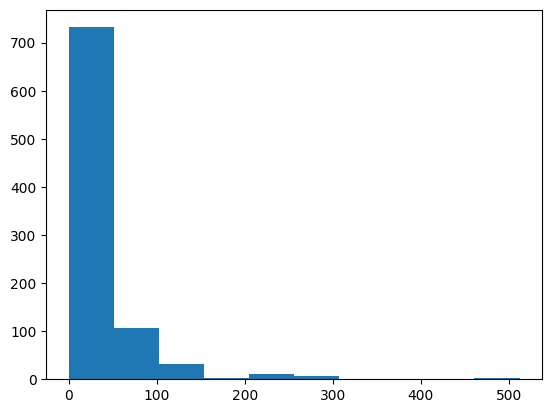

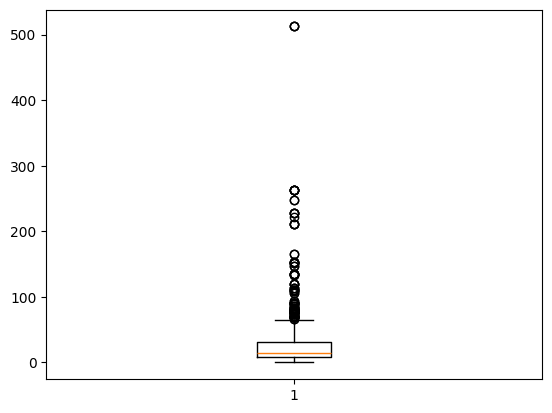

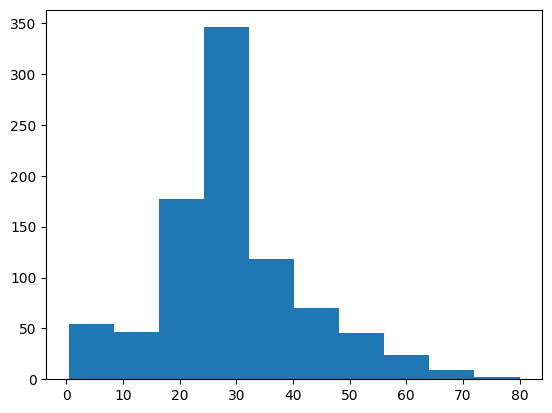

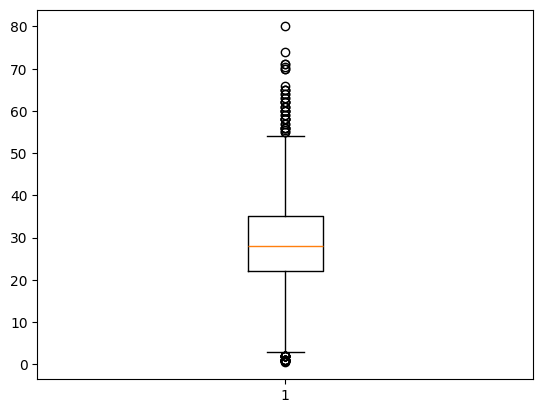

In [ ]:
#資料分組
print('想要進行資料分組前的察看')
print('圖表方式，hist與boxplot')
import matplotlib.pyplot as plt
fare1=titanic2['Fare']
plt.hist(fare1)
plt.show()
plt.boxplot(fare1)
plt.show()
age1=titanic2['Age']
plt.hist(age1)
plt.show()
plt.boxplot(age1)
plt.show()



In [ ]:
print('票價-cut')
print(pd.cut(fare1,4).value_counts())
print('票價-qcut')
print(pd.qcut(fare1,4).value_counts())
print('年齡-cut')
print(pd.cut(age1,4).value_counts())
print('年齡-qcut')
print(pd.qcut(age1,4).value_counts())

票價-cut
Fare
(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: count, dtype: int64
票價-qcut
Fare
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64
年齡-cut
Age
(20.315, 40.21]    562
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: count, dtype: int64
年齡-qcut
Age
(22.0, 28.0]     308
(0.419, 22.0]    231
(35.0, 80.0]     217
(28.0, 35.0]     135
Name: count, dtype: int64
